# Python for data analysis SkillCraft1 Laurine SALLE & Maélis YONES


#  <span style="color:#FD4887">Introduction</span>

### Introduction of the project 
As a final project of this semester, we are glad to present you our analysis of the dataset SkillCraft created by Mark Blair, Joe Thompson, Andrew Henrey and Bill Chen on September 20 of 2013.
SkillCraft1 is a game dataset with 20 attributes and 3395 instances of players from StarCraft 2.<br>
Our goal is to analyse the dataset more particularly the meaning variables in order to predict the league index of futur players. <br>
We are in a classification problem.

Here is the link of our dataset: https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#

### Some information given by the creators
-- We aggregated screen movements into screen-fixations using a Salvucci & Goldberg (2000) dispersion-threshold algorithm, and defined Perception Action Cycles (PACs) as fixations with at least one action. <br>
-- Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps. <br>
-- List of possible game actions is discussed in Thompson, Blair, Chen, & Henrey (2013)


### Attribute Information:

1. GameID: Unique ID number for each game (integer)
2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)
3. Age: Age of each player (integer)
4. HoursPerWeek: Reported hours spent playing per week (integer)
5. TotalHours: Reported total hours spent playing (integer)
6. APM: Action per minute (continuous)
7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
12. NumberOfPACs: Number of PACs per timestamp (continuous)
13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
15. ActionsInPAC: Mean number of actions within each PAC (continuous)
16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
18. UniqueUnitsMade: Unique unites made per timestamp (continuous)
19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

### Webscrapping ?

In order to enrich our project, we thought about the possibility of making webscrapping. To do that, we did some research to see if we could find some interesting data for our dataset. Unfortunately, no link allowed us to find the same data as our dataset in addition enriched. <br>
We find some links with player rankings and their country of residence (links below) and we thought we could retrieve and study the rankings by country. But this in no way enriches our original dataset.<br>
This is why our project does not contain webscrapping.
https://starcraft2.com/en-gb/ladder/grandmaster/2
https://www.gosugamers.net/starcraft2/rankings
https://sc2arcade.com/profile-list

!!!!!!!!!!!!!!!!! A supprimer
https://github.com/VictorGoubet/Dataset-Analysis/blob/master/Notebook.ipynb
https://github.com/JohnyLn/Python_For_Data_Analysis_Skillcraft1/blob/main/SkillCraft1_NoteBook.ipynb

#  <span style="color:#FD4887">Import useful libraries</span>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <span style="color:#FD4887">Import the dataset</span>

In [3]:
dataset =  pd.read_csv("SkillCraft1_Dataset.csv", sep = ",")

In [4]:
dataset.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [5]:
print("Dimension : ", dataset.shape)

Dimension :  (3395, 20)


There are 20 columns and 3395 values

# <span style="color:#FD4887">Data cleaning</span>

First, we can drop the column GameID because we will not use it, either for data visualisations, nor for predictions. This column do not give us useful information.

In [6]:
dataset.drop('GameID', axis=1, inplace=True)

Let's look at the types of the data 

In [7]:
dataset.dtypes

LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

We can see that the majority of the columns are already numeric, except the columns Age , HoursPerWeek and TotalHours

Let's see if there is nan values 

In [8]:
dataset.isna().any()

LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

How lucky we are! there are not null values

Let's look at the values in the column Age, HoursPerWeek and TotalHours : 

In [9]:
print("Age : " ,  pd.unique(dataset['Age']), "\n")
print("HoursPerWeek : " ,  pd.unique(dataset['HoursPerWeek']), "\n")
print("TotalHours : " ,  pd.unique(dataset['TotalHours']))

Age :  ['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39' '?'] 

HoursPerWeek :  ['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '?' '80' '60'] 

TotalHours :  ['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '?' '35' '1163' '333' '75' '7' '40' '325' '90' '175'
 '88' '850' '26' '1650' '465' '235' '1350' '460' '848' '256' '130' '146

We can see that there is a "?" value in each column. Let's count the number of "?" for each column.

In [10]:
def count_question_mark(dataset):
    cols = dataset.columns
    wrong_value = pd.DataFrame(columns=['col_name','nb_of_?'])
    for i in range(len(cols)):
        count = len(dataset[dataset[cols[i]]=='?'])
        wrong_value = wrong_value.append({'col_name': cols[i],'nb_of_?': count},ignore_index=True)
    return wrong_value

count_question_mark(dataset)

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,col_name,nb_of_?
0,LeagueIndex,0
1,Age,55
2,HoursPerWeek,56
3,TotalHours,57
4,APM,0
5,SelectByHotkeys,0
6,AssignToHotkeys,0
7,UniqueHotkeys,0
8,MinimapAttacks,0
9,MinimapRightClicks,0


For the Age, the HoursPerWeek and the TotalHours, there are respectively 55, 56 and 57 occurences of "?" <br>
Now let's see where are those "?" in the dataset

In [11]:
dataset[dataset['TotalHours']=='?']

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


In [12]:
print("Number of players whose league index is 8 :", dataset['LeagueIndex'].value_counts()[8])

Number of players whose league index is 8 : 55


We can see that the "?" for the 3 columns are in the same rows. And except the rows 358 and 1841, all the leagueindex is 8. <br>
We can also see that the total number of rows with leagueindex = 8 is 55, so all the rows with leagueindex = 8 have "?" value for Age, totalHours and HoursPerWeek. <br>

**We can replace the '?' values by the mean value of the corresponding column.** <br>
For that, first, we transform the Age, HoursPerWeek and TotalHours into numeric values

In [13]:
dataset["HoursPerWeek"] = pd.to_numeric(dataset["HoursPerWeek"], errors = 'coerce')
dataset["TotalHours"] = pd.to_numeric(dataset["TotalHours"], errors = 'coerce')
dataset["Age"] = pd.to_numeric(dataset["Age"], errors = 'coerce')

In [14]:
dataset.isna().sum()

LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

Then, we transform the null values with the mean value of the column to not impact the statistics of the dataset:

In [15]:
dataset.fillna(dataset.mean(), inplace = True)

We can check if we success to replace the age by the mean by looking at a subset of the values we had to replac : 

In [16]:
dataset["Age"].loc[3340:3350,]

3340    21.647904
3341    21.647904
3342    21.647904
3343    21.647904
3344    21.647904
3345    21.647904
3346    21.647904
3347    21.647904
3348    21.647904
3349    21.647904
3350    21.647904
Name: Age, dtype: float64

Great ! The values are replaced by the mean!

**Let's look at the statistics of the dataset, to see if the values are relevant**

In [17]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
LeagueIndex,3395.0,4.184094,1.517327,1.000000,3.000000,4.000000,5.000000,8.000000
Age,3395.0,21.647904,4.172119,16.000000,19.000000,21.000000,24.000000,44.000000
HoursPerWeek,3395.0,15.910752,11.863809,0.000000,8.000000,12.000000,20.000000,168.000000
TotalHours,3395.0,960.421809,17172.094828,3.000000,300.000000,500.000000,800.000000,1000000.000000
APM,3395.0,117.046947,51.945291,22.059600,79.900200,108.010200,142.790400,389.831400
SelectByHotkeys,3395.0,0.004299,0.005284,0.000000,0.001258,0.002500,0.005133,0.043088
AssignToHotkeys,3395.0,0.000374,0.000225,0.000000,0.000204,0.000353,0.000499,0.001752
UniqueHotkeys,3395.0,4.364654,2.360333,0.000000,3.000000,4.000000,6.000000,10.000000
MinimapAttacks,3395.0,0.000098,0.000166,0.000000,0.000000,0.000040,0.000119,0.003019
MinimapRightClicks,3395.0,0.000387,0.000377,0.000000,0.000140,0.000281,0.000514,0.004041


<div class="alert alert-block alert-info">
    <b>We can make some observations :</b> <br><br>
    <b>For the column HoursPerWeek</b> : the maximum value is 168 hours per week of gaming. That means that the player plays 24h per day!! It is impossible, so that is an error. <br>
We will consider that the maximum HoursPerWeek allowed is 140h/week (corresponding to 20h/day) <br><br>
<b>For the column TotalHours</b> : the maximum value is 1000000, and that is impossible. The game released on the 27 july 2010, and the dataset was created in september 2013, so the difference of time is 3 years and 3 months approximately. 3*365 + 90 = 1185 days. 1185 * 20h = 23700 hours. <br>
We will consider that the maximum TotalHours allowed is 23700h
</div>

Let's see thoses rows, that exceed the maximum value allowed:

In [18]:
dataset[dataset["TotalHours"]>23700]

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1793,5,18.0,24.0,1000000.0,281.4246,0.023428,0.000799,5,0.000041,0.000447,0.005136,28.1164,36.1266,5.8522,29,0.001328,6,0.0,0.000000
2324,6,20.0,8.0,25000.0,247.0164,0.015794,0.000438,8,0.000308,0.001339,0.004645,17.6471,37.1837,6.5944,29,0.001860,6,0.0,0.000012


In [19]:
dataset[dataset["HoursPerWeek"]>140]

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
690,6,16.0,168.0,1260.0,233.3058,0.017521,0.000744,10,0.000178,0.000235,0.005137,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502


Since there is only 3 rows which have such anomalies, we can simply drop them.

In [20]:
dataset.drop(dataset[dataset["TotalHours"]>23700].index, inplace = True)
dataset.drop(dataset[dataset["HoursPerWeek"]>140].index, inplace = True)

# <span style="color:#FD4887">Data visualisations</span>

First, let's have an overview of the dataset, by plotting a histogram of each variable.


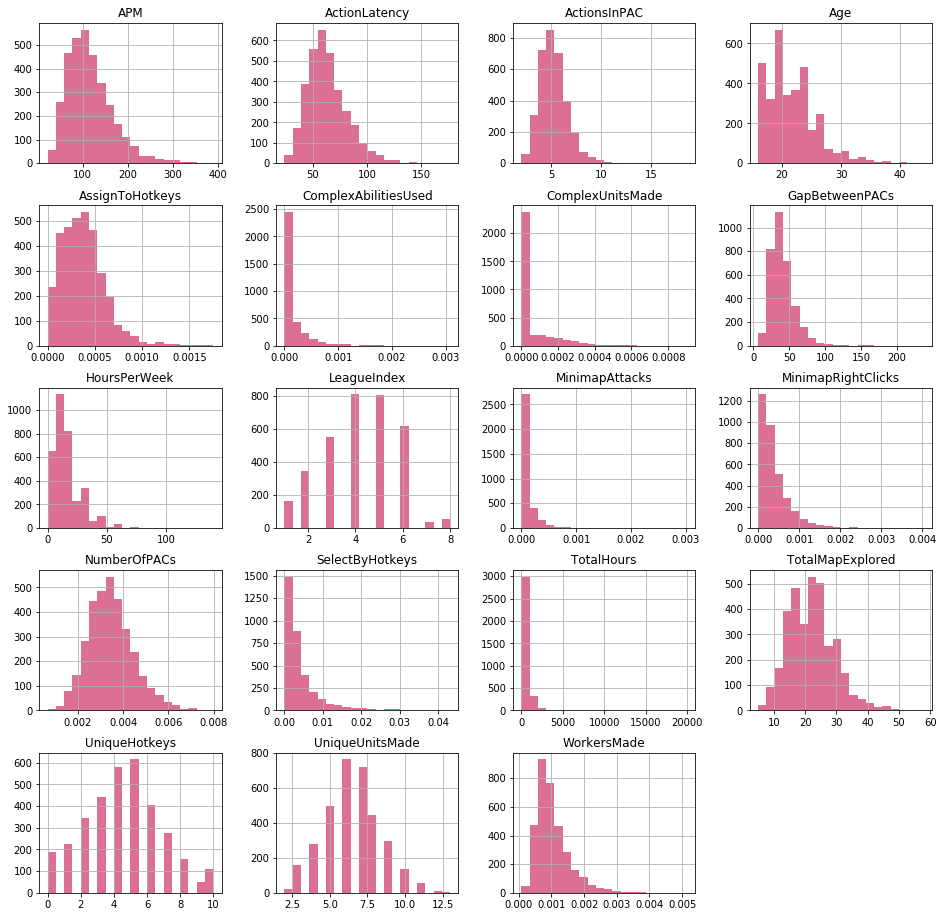

In [21]:
dataset.hist(bins=20, figsize=(16, 16), color = 'palevioletred');

<div class="alert alert-block alert-info">
Our dataset seems to be composed of a lot of player having a LeagueIndex between 3 and 6, then the number drops drastically, this might be a problem to well predict the LeagueIndex 7 and 8, because those players are underrepresented in the dataset. <br>

We can also observe that the majority of the variables follows a normal distribution, according to the shape of the graphs.<br>

Some variables seem to be interesting to analyse due to the variability of the graph such as HoursPerWeek, APM, NumberOfPACs and so on.<br>
</div>

Then, in order to concretely see the links between our different variables, we construct the correlation matrix.

(19.0, 0.0)

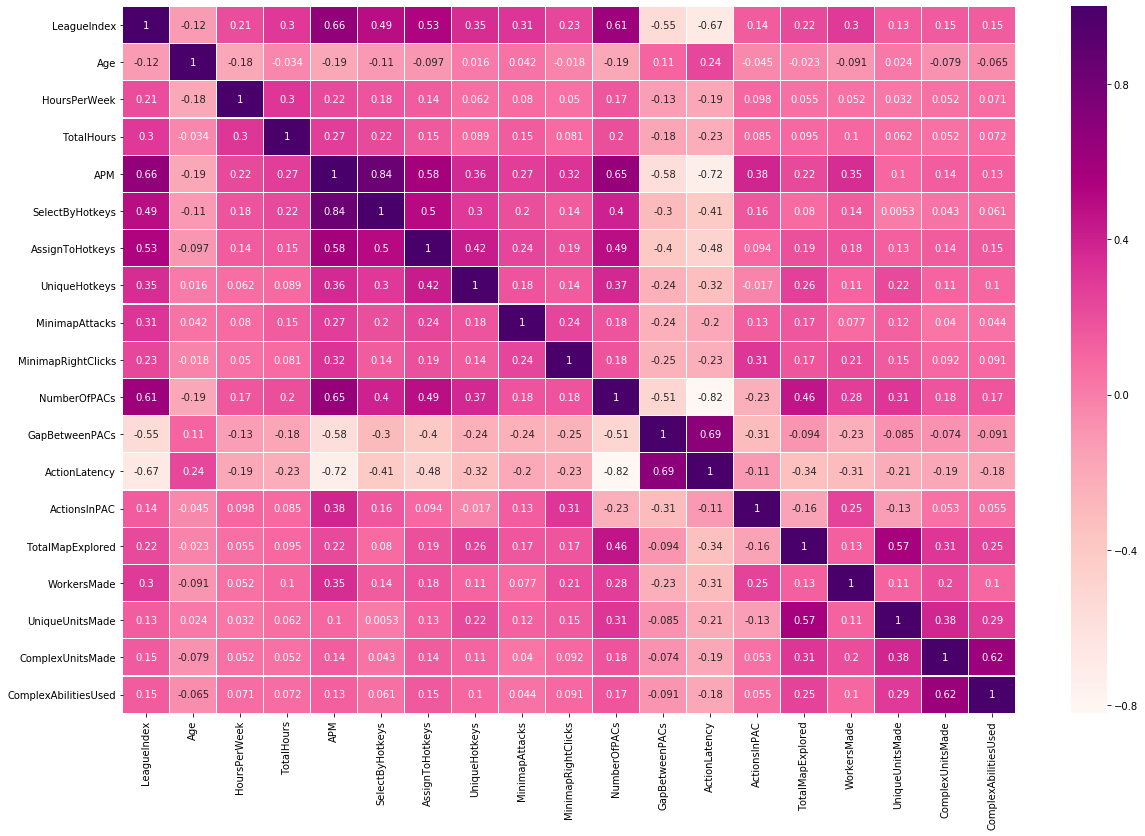

In [22]:
plt.figure(figsize=(20, 13))
ax = sns.heatmap(dataset.corr(),
            cmap='RdPu',
            annot=True, 
           linewidths = 0.2);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<div class="alert alert-block alert-info">
    <b>Some observations we can make : </b>


We could suppose that age can have an impact on the LeagueIndex of the player and yet the correlation matrix shows a score of -0.12 which has no significance. That doesn't means that old players and young players have the same League. In fact, we can see in the previous graph that the great majority of the players are between 15 and 30 years old (the oldest player has 44 yers old). So the dataset represents significatively young people. <br><br>


Nevertheless, the correlation matrix shows that some variables are significatively positively or negatively correlated with LeagueIndex, which will allow us to focus on these variables and analyse them more in depth.

<b>Data positively correlated with LeagueIndex:</b> APM (0.66), SelectByHotkeys (0.49), AssignToHotkeys (0.53), NumberOfPACs (0.61)

<b>Data negatively correlated with LeagueIndex:</b> GapBetweenPACs (-0.55), ActionLatency (-0.67)

We can therefore anticipate the profile of a good player with a low latency, quick reaction, a big number of action, etc. <br><br>


In the correlation matrix, we can also observe strong correlations between other columns, such as the correlation between APM and SelectByHotkeys (0.84), and the one between NumberOfPACs and ActionLatency (-0.82). 
</div>

Text(0.5, 1.0, 'Repartition of the league index in our dataset')

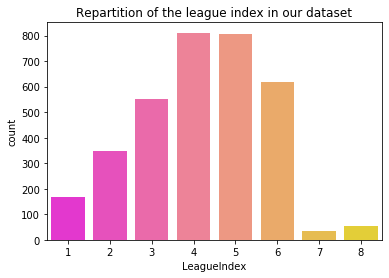

In [23]:
sns.countplot('LeagueIndex', data=dataset, palette = "spring")
plt.title("Repartition of the league index in our dataset")

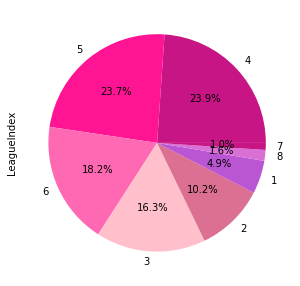

In [24]:
plt.figure(figsize=(5, 5))
dataset['LeagueIndex'].value_counts().plot.pie(autopct='%1.1f%%', colors = ["mediumvioletred", "deeppink", "hotpink", "pink", "palevioletred", "mediumorchid", "orchid"])

From the two graphs above, we see that our dataset is mostly made up of leagueIndex 4 and 5 (47,6%). It contains less than 3% of LeagueIndex 7 and 8, so those players are underrepresented in the dataset. That is why, for the prediction part, it could be a good idea to group the league indexes in order to have more significant predictions. 

<Figure size 1440x1080 with 0 Axes>

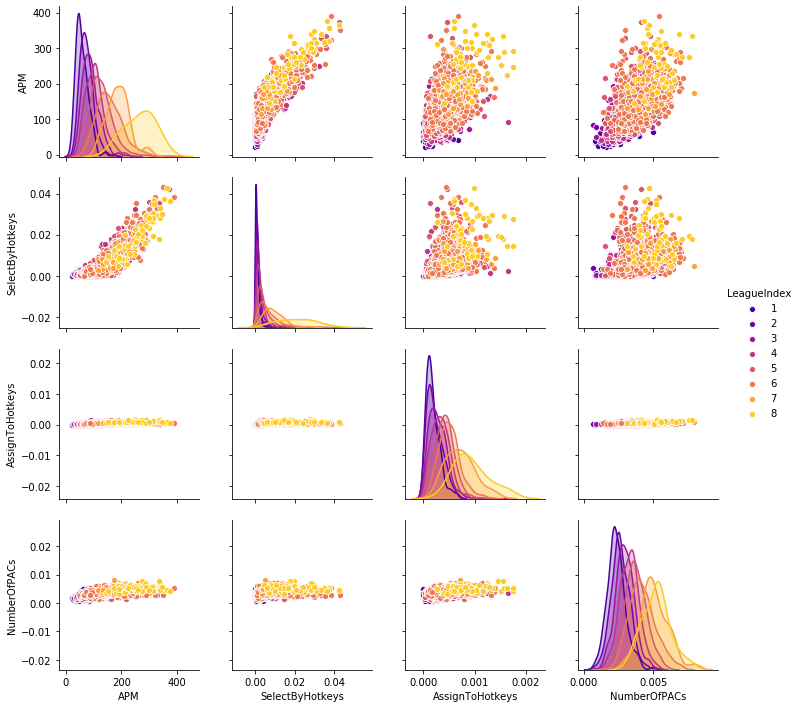

In [25]:
plt.figure(figsize=(20,15))
feature_positive_correlated = ['APM','SelectByHotkeys','AssignToHotkeys','NumberOfPACs']
sns.pairplot(dataset,hue = 'LeagueIndex',vars =feature_positive_correlated,palette="plasma")

To analyze the relationships between values positively correlated with the player’s league LeagueIndex, we build a pairplot.

From this pairplot, we can make some deductions :<br>
A low level player (leagueIndex 1 to 3) has a low NumberOfPacs which induces few action cycles and therefore not too many activities in the game (low APM). This is supported by little use of Hotkeys keyboard shortcuts (SelectByHotkeys and AssignToHotkeys low).

From this pairplot, we can deduce that a good player will have many actions per minute (APM) and NumberOfPACs.

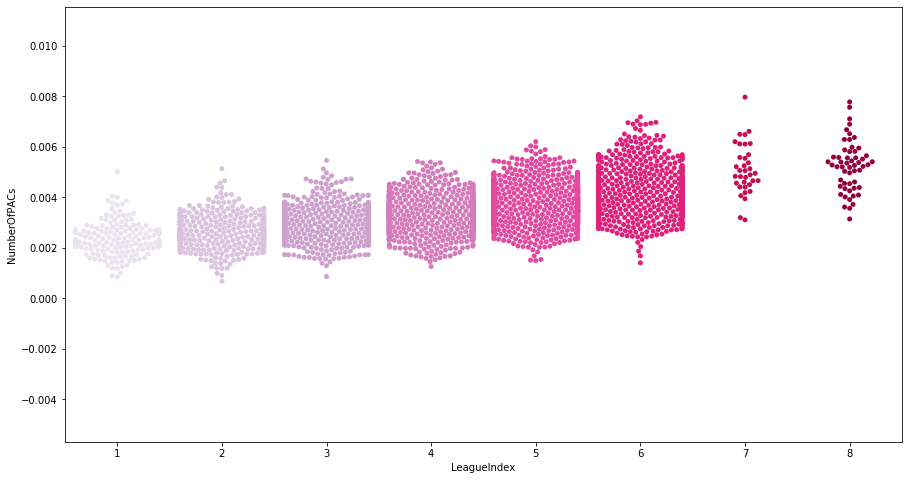

In [26]:
plt.figure(figsize=(15, 8))
ax=sns.swarmplot(x='LeagueIndex', y='NumberOfPACs',data=dataset, palette = 'PuRd')

Through this graph which illustrates the Number of Cycle Perception Action (NumbersOfPACs) according to the LeagueIndex, we can see that the more the LeagueIndex increases and the more the NumberOfPACs increases. <br> This type of graph also allows us to see that the evolution is made little by little because many points are in common between different LeagueIndex but always with points above the previous level.

### Graphs showing the link between time spent on the game and the LeagueIndex

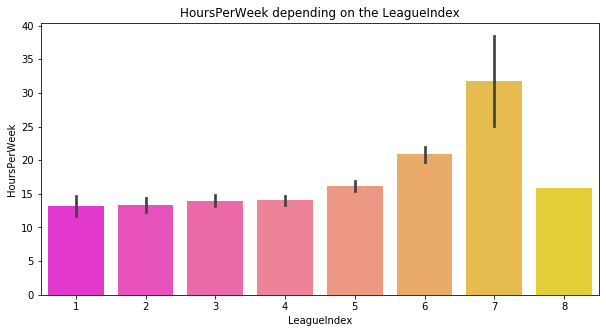

In [27]:
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="LeagueIndex")
plt.ylabel(ylabel="HoursPerWeek")
sns.barplot(x='LeagueIndex', y='HoursPerWeek', data=dataset, palette="spring")
plt.title("HoursPerWeek depending on the LeagueIndex")
plt.show()

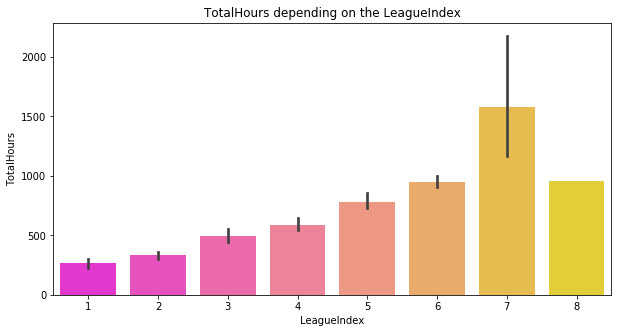

In [28]:
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="LeagueIndex")
plt.ylabel(ylabel="TotalHours")
sns.barplot(x='LeagueIndex', y='TotalHours', data=dataset, palette="spring")
plt.title("TotalHours depending on the LeagueIndex")
plt.show()

Whether it's the time spent per week or the total game time, we notice that, from league 1 to league 7, players spending the most time on the game have higher LeagueIndex. But it is not the case for League 8. This can be explained because the league 8 represents only 1% of the dataset (around 50 values), so it might not represent the reality. 

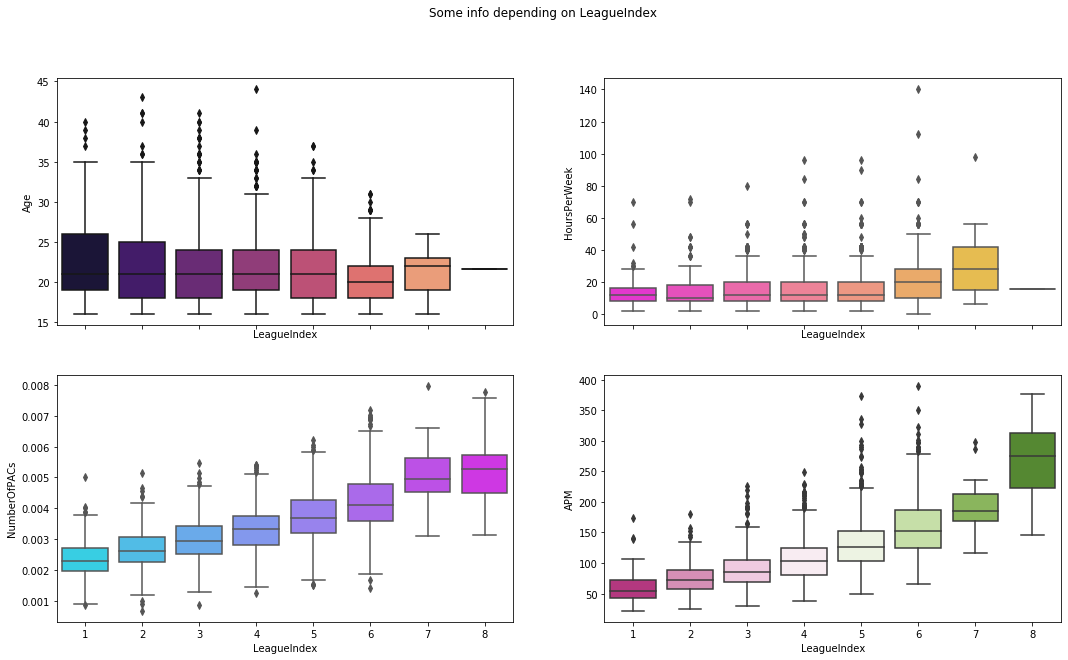

In [29]:
fig, axs = plt.subplots(2,2,figsize=(18, 10),sharex=True)

fig.suptitle('Some info depending on LeagueIndex')

sns.boxplot(ax=axs[0, 0], data=dataset, x='LeagueIndex', y='Age', palette = "magma")
sns.boxplot(ax=axs[0, 1], data=dataset, x='LeagueIndex', y='HoursPerWeek', palette = "spring")
sns.boxplot(ax=axs[1, 0], data=dataset, x='LeagueIndex', y='NumberOfPACs', palette = "cool")
sns.boxplot(ax=axs[1, 1], data=dataset, x='LeagueIndex', y='APM', palette = "PiYG")

Through these boxplots we can see that the variale Age does not vary so much according to the LeaugueIndex. (but, as we said previously, the players are all young, under 44 years old).<br>
The same for HoursPerWeek which is roughly constant. <br>
As a reminder, for league 8, we replaced the age and the HoursPerWeek by the mean of the values because all the values were empty, that is why the box is flat.  <br>
However, with regard to APM or NumberOfPACs, we can see a real evolution, the values are going higher when the leagueIndex increase. 

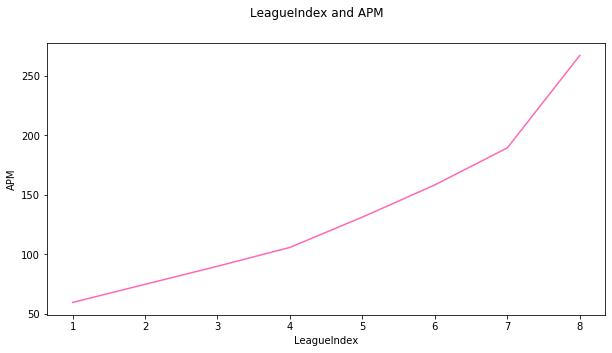

In [30]:
plt.subplots(figsize=(10,5))
plt.suptitle('LeagueIndex and APM')
sns.lineplot(data=dataset, x='LeagueIndex', y='APM', ci=None, color = "hotpink")

We can see on this graph that the best players are the ones with the most action per minute. Indeed, an experienced player will react faster and do more actions which logically results in finer and more optimized management of resources, units, etc.

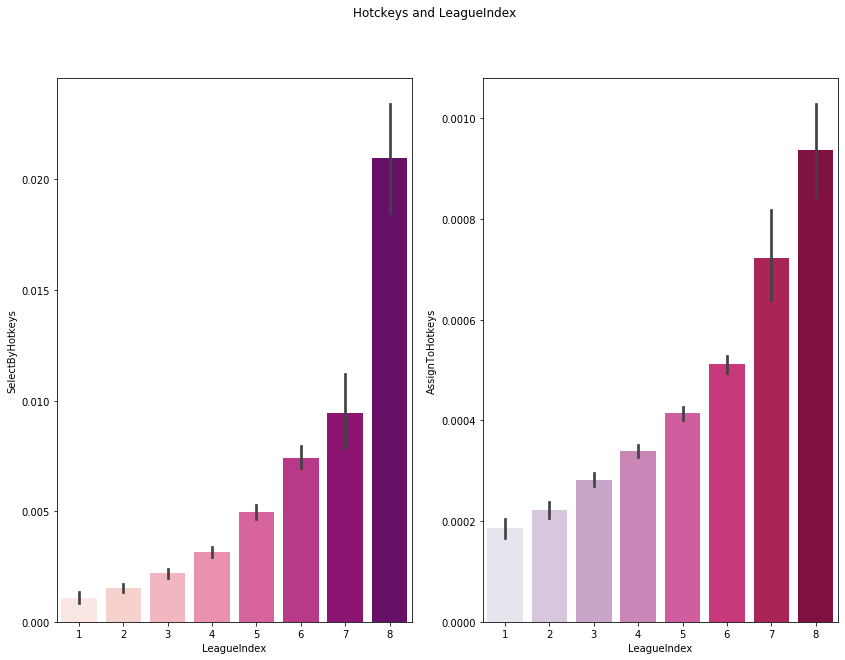

In [31]:
fig, axs = plt.subplots(1,2,figsize=(14, 10),sharex=True)
fig.suptitle('Hotckeys and LeagueIndex')
sns.barplot(ax=axs[0],data=dataset, x='LeagueIndex', y='SelectByHotkeys', palette = "RdPu")
sns.barplot(ax=axs[1],data=dataset, x='LeagueIndex', y='AssignToHotkeys', palette = "PuRd")

Through these barplot, we can clearly see the importance of the SelectByHotckeys and AssignToHotckeys variables to have a good level. <br>
In other words, players using keyboard shortcuts a lot to perform actions have a better level. This can be explained by their ease in the game and by the fact of using the shortcuts they go faster and thus optimizes the playing time by increasing the actions performed. All these factors are important to achieve better LeagueIndex.

# <span style="color:#FD4887">Machine Learning : predict the LeagueIndex</span>

### <span style="color:#9B31A8">Import all the needed libraries</span>

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### <span style="color:#9B31A8">Split the dataset into train and test sets</span>

In [33]:
x=dataset.drop('LeagueIndex',axis=1)
y = dataset.LeagueIndex
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print("x_train : ",  x_train.shape)
print("y_train : ",  y_train.shape)
print("x_test : ",  x_test.shape)
print("y_test : ",  y_test.shape)

x_train :  (2374, 18)
y_train :  (2374,)
x_test :  (1018, 18)
y_test :  (1018,)


### <span style="color:#9B31A8">Useful functions</span>

Dictionnary of the train methods we will use

In [34]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
}

Function that trains each model 

In [35]:
def train_models(x_train, y_train, x_test, y_test, no_classifiers = 5, verbose = True):
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:

        classifier.fit(x_train, y_train)
                       
        preds = classifier.predict(x_test)
        test_score = accuracy_score(y_test, preds)

        train_score = classifier.score(x_train, y_train)
        #test_score = classifier.score(x_test, y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score}
        if verbose:
            print("trained {c} ".format(c=classifier_name))
    return dict_models, preds

Function that displays the scores (accuracies) for the models (with a graph) <br>
**The accuracy is computed doing : correct_predictions / all_predictions**

In [36]:
def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]

    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),3)), columns = ['classifier', 'train_score', 'test_score'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))
    
    plt.figure(figsize=(12,4))
    sns.barplot(x=cls, y = df_['test_score'], palette = 'PuRd')
    plt.xlabel('\nAlgorithm', fontsize=15, color = 'mediumvioletred')
    plt.ylabel("Accuracy\n", fontsize=15, color = 'mediumvioletred')
    plt.title("Accuracy for each algorithm\n", fontsize=18, color = 'mediumvioletred')
    plt.xticks(rotation= 20)

<span style="color:#6779D7"><b>Prediction n°1</b> : prediction without cross validation and without normalized values</span>

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


trained Logistic Regression 
trained Nearest Neighbors 


C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


trained Linear SVM 
trained Gradient Boosting Classifier 
trained Decision Tree 
trained Random Forest 
trained Naive Bayes 


C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,classifier,train_score,test_score
0,Logistic Regression,0.409014,0.394892
3,Gradient Boosting Classifier,0.830666,0.390963
6,Naive Bayes,0.396799,0.382122
5,Random Forest,0.989048,0.343811
1,Nearest Neighbors,0.541281,0.336935
4,Decision Tree,1.000000,0.325147
2,Linear SVM,1.000000,0.250491


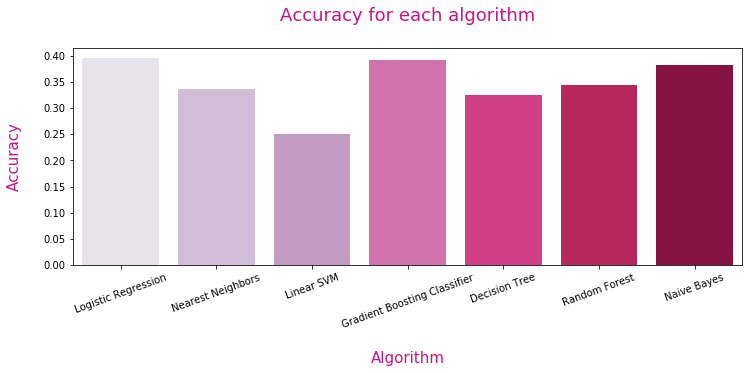

In [37]:
dict_models, preds = train_models(x_train, y_train, x_test, y_test, no_classifiers = 8)
display_dict_models(dict_models)


<div class="alert alert-block alert-info">
We can see that the accuracies are very low. The maximum is around 0.40, and the top3 best models are : Gradient boosting classifier, Logistic regression and Naive Bayes.
</div>

Let's try to train the models with cross validation, which will give us a more significant accuracy. 

### <span style="color:#9B31A8"> Cross validation</span>

The cross validation technique is used to protect the model from overfitting. 
It will use all parts of the dataset as train data, and test data, and then summarize the results. 

This function will train all the models with cross validation 

In [38]:
def train_cross_val_models(x, y, no_classifiers = 5, verbose = True):
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        
        scores = cross_val_score(classifier, x, y, cv=5)
        
        dict_models[classifier_name] = {'model': classifier, 'score': scores.mean()}
        if verbose:
            print("trained {c} ".format(c=classifier_name))
    return dict_models

This function will display all the scores obtained with cross validation, with a graph

In [39]:
def display_dict_cross_val_models(dict_models, sort_by='score'):
    cls = [key for key in dict_models.keys()]
    s = [dict_models[key]['score'] for key in cls]

    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),2)), columns = ['classifier', 'score'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'score'] = s[ii]

    display(df_.sort_values(by=sort_by, ascending=False))
    
    plt.figure(figsize=(12,4))
    sns.barplot(x=cls, y = df_['score'], palette = 'PuRd')
    plt.xlabel('\nAlgorithm', fontsize=15, color = 'mediumvioletred')
    plt.ylabel("Accuracy\n", fontsize=15, color = 'mediumvioletred')
    plt.title("Accuracy for each algorithm\n", fontsize=18, color = 'mediumvioletred')
    plt.xticks(rotation= 20)

<span style="color:#6779D7"><b>Prediction n°2</b> : 2nd prediction (with cross validation and without normalized values)</span>

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

trained Logistic Regression 
trained Nearest Neighbors 


C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\skle

trained Linear SVM 
trained Gradient Boosting Classifier 
trained Decision Tree 
trained Random Forest 
trained Naive Bayes 


,classifier,score
3,Gradient Boosting Classifier,0.403593
0,Logistic Regression,0.397987
6,Naive Bayes,0.394145
5,Random Forest,0.372921
1,Nearest Neighbors,0.354661
4,Decision Tree,0.341667
2,Linear SVM,0.241151


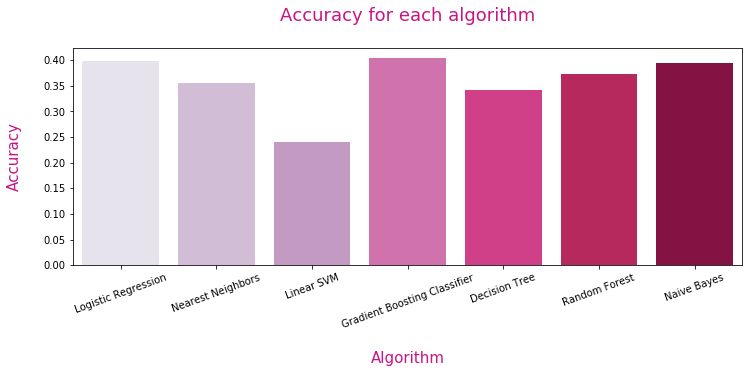

In [40]:
dict_models = train_cross_val_models(x, y, no_classifiers = 8)
display_dict_cross_val_models(dict_models)

Comparing with the previous predictions, we can see that the accuracies changed a little. But the top 3 remains the same models : Gradient Boosting Classifier, Logistic Regression and Naive Bayes, also with around 0.40 of accuracy. <br>
We can also try the same predictions, with normalized values, to see the difference.

### <span style="color:#9B31A8"> Normalize values</span>

In [41]:
scaler=StandardScaler()
#scaler.fit(x_train)
#scaler.fit(x_test)
#scaler.fit(x)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_scaled=scaler.fit_transform(x)

<span style="color:#6779D7"><b>Prediction n°3</b> : 3rd prediction (with cross validation and with normalized values)</span>

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

trained Logistic Regression 
trained Nearest Neighbors 


C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\skle

trained Linear SVM 
trained Gradient Boosting Classifier 
trained Decision Tree 
trained Random Forest 
trained Naive Bayes 


,classifier,score
2,Linear SVM,0.408280
3,Gradient Boosting Classifier,0.407399
0,Logistic Regression,0.403844
5,Random Forest,0.390332
6,Naive Bayes,0.361157
1,Nearest Neighbors,0.349095
4,Decision Tree,0.344917


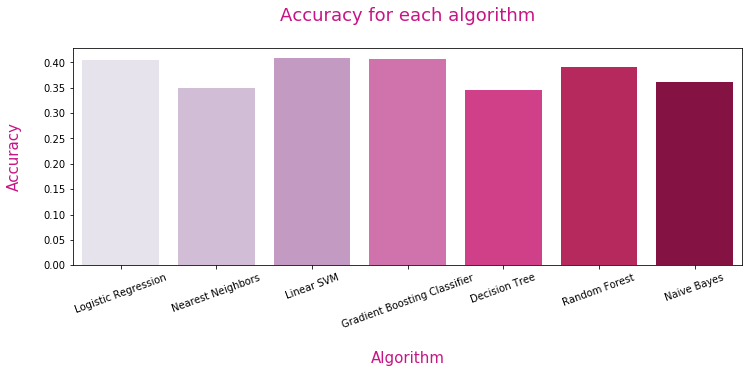

In [42]:
dict_models = train_cross_val_models(x_scaled, y, no_classifiers = 8)
display_dict_cross_val_models(dict_models)

<div class="alert alert-block alert-info">
We can see that the top 3 changed a little. Previously it was (without normalization): <br>
Gradient Boosting classifier : 0.403295 <br>
Logistic Regression: 0.397987 <br>
Naive Bayes : 0.394145 <br>

And now, it is (with normalization): <br>
GB classifier: 0.410945 <br>
Linear SVM: 0.408280 <br> 
Logistic Regression: 0.403844 <br>

(the accuracies are approximative, since they change each time we run the training algorithms)

We can see that the scores improves a little with normalization, but it still is not enough to have a good prediction.
</div>

### <span style="color:#9B31A8">  New approach : predict player's Level:</span>

We can question the pertinency of predicting LeagueIndex. <br>
If the results are such low, it means that for each leagueIndex, the differences between the values are not enough significant to really predict the League. <br><br>
**So we will try a new approach**. <br>
Instead of predicting the LeagueIndex direcly, we will create another column, that we will call PlayerLevel, which have 3 levels : <br>
- level 1 cooresponds to LeagueIndex from 1 to 3 (beginer player) <br>
- level 2 cooresponds to LeagueIndex from 4 to 6 (intermediate player)<br>
- level 3 cooresponds to LeagueIndex from 7 to 8 (advanced player)<br>

Those categories will probably help to better predict the player's level.

First, we create a new column in the dataset, with the new categories

In [43]:
# create a list of our conditions
conditions = [
    (dataset['LeagueIndex'] <= 3),
    (dataset['LeagueIndex'] > 3) & (dataset['LeagueIndex'] <= 6),
    (dataset['LeagueIndex'] > 6)
    ]

# create a list of the values we want to assign for each condition
values = [1, 2, 3]

# create a new column
dataset['PlayerLevel'] = np.select(conditions, values)

In [44]:
# check if the new column is here
dataset.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,PlayerLevel
0,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000,2
1,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208,2
2,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189,2
3,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384,1
4,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019,1


The new column PlayerLevel is at the end of the dataset, great!

Then, we split the new dataset

In [45]:
x_level= dataset.drop('LeagueIndex',axis=1)
x_level= x_level.drop('PlayerLevel',axis=1)
y_level = dataset.PlayerLevel
x_level_train,x_level_test,y_level_train,y_level_test = train_test_split(x_level,y_level,test_size=0.3)

In [46]:
scaler.fit(x_level_train)
scaler.fit(x_level_test)
scaler.fit(x_level)
x_level_train_scaled=scaler.transform(x_level_train)
x_level_test_scaled=scaler.transform(x_level_test)
x_level_scaled=scaler.transform(x_level)

And we make our first prediction with this new output column!

<span style="color:#6779D7"><b>Prediction n°4</b> : 4th prediction (predict the level, **with** cross validation and **without** normalized values)</span>

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

trained Logistic Regression 
trained Nearest Neighbors 


C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\skle

trained Linear SVM 
trained Gradient Boosting Classifier 
trained Decision Tree 
trained Random Forest 
trained Naive Bayes 


,classifier,score
3,Gradient Boosting Classifier,0.802484
5,Random Forest,0.787449
0,Logistic Regression,0.784497
1,Nearest Neighbors,0.773294
6,Naive Bayes,0.761201
4,Decision Tree,0.730847
2,Linear SVM,0.658904


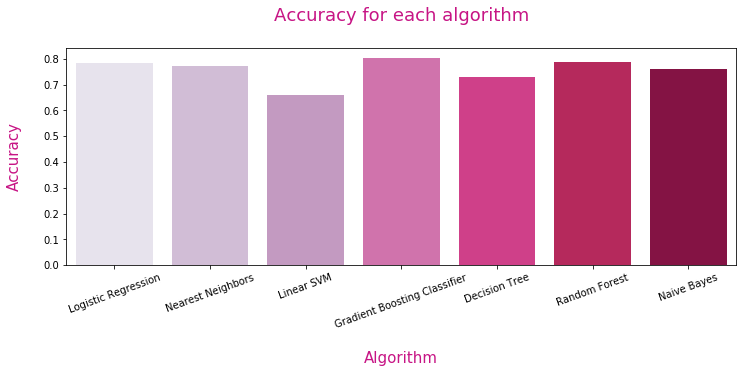

In [47]:
dict_models = train_cross_val_models(x, y_level, no_classifiers = 8)
display_dict_cross_val_models(dict_models)

<div class="alert alert-block alert-info">
    With this new column PlayerLevel as an output, <b>the accuracies are much better than before</b>. The top 3 is : <br>
Gradient Boosting Classifier (around 0.80) <br>
Random Forest (around 0.79)<br>
Logistic Regression (around 0.78)<br>

So this method is more relevent than using directly the leagueIndex. So we will continue with this method.<br>
We can also see that in the top 3 best models, there is Gradient Boosting Classifier and Logistic Regression, just like before.
</div>

We can do the same but with normalized values to see the difference:

<span style="color:#6779D7"><b>Prediction n°5</b> : 5th prediction (predict the level, **with** cross validation and **with** normalized values)</span>

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

trained Logistic Regression 
trained Nearest Neighbors 


C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\skle

trained Linear SVM 
trained Gradient Boosting Classifier 
trained Decision Tree 
trained Random Forest 
trained Naive Bayes 


,classifier,score
2,Linear SVM,0.798058
3,Gradient Boosting Classifier,0.797180
0,Logistic Regression,0.793340
5,Random Forest,0.784799
1,Nearest Neighbors,0.767103
4,Decision Tree,0.723770
6,Naive Bayes,0.715209


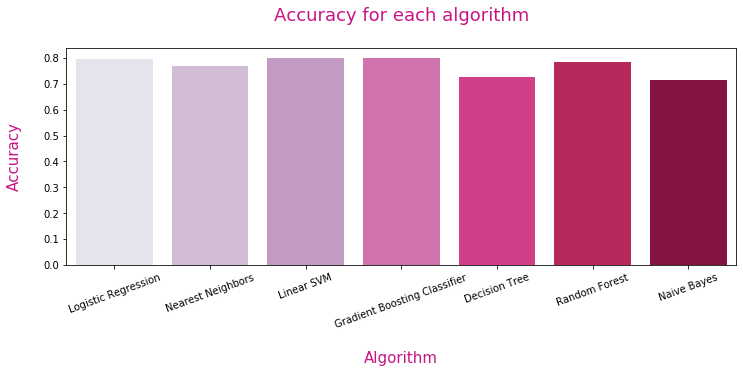

In [48]:
dict_models = train_cross_val_models(x_scaled, y_level, no_classifiers = 8)
display_dict_cross_val_models(dict_models)

<div class="alert alert-block alert-info">
Top 3 without normalized values: <br>
Gradient Boosting Classifier  <br>
Random Forest <br>
Logistic Regression <br>

Now, the top 3 with normalized values: <br>
Gradient Boosting Classifier  <br>
Linear SVM  <br>
Logistic Regression  <br>

Like before (predictions 2 and 3), we have Gradient Boosting classifier and Logistic Regression in the top 3, with similar scores. <br><br>
The top 3 scores obtained without normalizing values are very slightly better than the ones obtained with normalized values. So we will continue the predictions without normalized values.
</div>

**After all those predictions, we can clearly conclude that the best models are Gradient Boosting Classifier and Logistic regression, because they appear in the top 3 best predictions for all methods used.** <br>

The next step is to search for the best parameters for those 2 models in order to increase the accuracy

### <span style="color:#9B31A8"> Grid search for Logistic regression </span>

Let's try a grid search for Logistic Regression, on non scaled values: 

In [49]:
parameters = dict(C =np.logspace(-4, 4, 20),
                 penalty=['l1', 'l2'],
                 max_iter = [100, 500, 1000])
clf_GS = GridSearchCV(LogisticRegression(), parameters)
best_clf_log = clf_GS.fit(x_level, y_level)
print('Best Parameters:', best_clf_log.best_estimator_)
print('Accuracy: ', best_clf_log.best_score_)

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\lin

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\lo

Best Parameters: LogisticRegression(C=1438.44988828766, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy:  0.7942216981132075


C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy : 0.79764


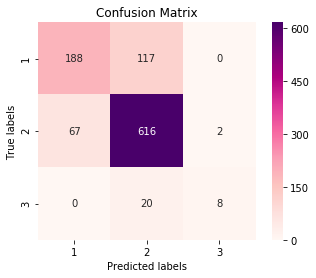

In [52]:
model_Log = LogisticRegression(C = 1438, penalty = 'l1', max_iter = 500)
model_Log = model_Log.fit(x_level_train, y_level_train)
prediction = model_Log.predict(x_level_test)
conf_matrix = confusion_matrix(y_level_test, prediction)

ax = sns.heatmap(conf_matrix, annot=True, square=True, fmt = 'g', cmap="RdPu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '2', '3']); 
ax.yaxis.set_ticklabels(['1', '2', '3']);
print('Accuracy : %.5f' % accuracy_score(y_level_test, prediction))

The accuracy is around 0.80 (instead of 0.78 without the grid search). So the result improved. 
We can observe, with the confusion matrix, that the level 3 (corresponding to the LeagueIndex 7 and 8) is not well predicted. That is because there is only 2.6% of the data which is level 3, so it is not enough to significatively represent this level.


### <span style="color:#9B31A8"> Grid search for Gradient Boosting Classifier </span>

Gradient boosting without scaling :

In [53]:
parameters = dict(max_depth = [3, 5, 8],
                 learning_rate = [ 0.01, 0.1, 0.15, 0.2, 1], 
                 min_samples_split = [0.1, 2, 10, 20],
                 subsample = [0.5, 0.8, 1], 
                 n_estimators = [5, 10])
clf_GS = GridSearchCV(GradientBoostingClassifier(), parameters)
best_clf_gb = clf_GS.fit(x_level, y_level)
print('Best Parameters:', best_clf_gb.best_estimator_)
print('Accuracy: ', best_clf_gb.best_score_)

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters: GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=20,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy:  0.8018867924528302


Accuracy : 0.795


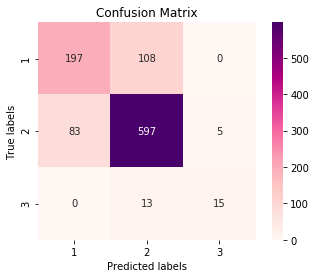

In [54]:
model_GB = GradientBoostingClassifier(learning_rate = 0.2, min_samples_split = 20, max_depth = 3, subsample = 0.8, n_estimators = 10)
model_GB = model_GB.fit(x_level_train, y_level_train)
prediction = model_GB.predict(x_level_test)
conf_matrix = confusion_matrix(y_level_test, prediction)

ax = sns.heatmap(conf_matrix, annot=True, square=True, fmt = 'g', cmap="RdPu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '2', '3']); 
ax.yaxis.set_ticklabels(['1', '2', '3']);
print('Accuracy : %.3f' % accuracy_score(y_level_test, prediction))

The accuracy is around 0.80. 

Let's also try the grid search for gradient boosting classifier on the initial dataset, to predict the league index

In [57]:
parameters = dict(max_depth = [3, 5, 8],
                 learning_rate = [ 0.01, 0.1, 0.15, 0.2, 1], 
                 min_samples_split = [0.1, 2, 10, 20],
                 subsample = [0.5, 0.8, 1], 
                 n_estimators = [5, 10])
clf_GS = GridSearchCV(GradientBoostingClassifier(), parameters)
best_clf_gb_league = clf_GS.fit(x, y)
print('Best Parameters:', best_clf_gb_league.best_estimator_)
print(best_clf_gb_league.best_score_)

C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Laurine SALLE\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters: GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=20,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
0.4047759433962264


Accuracy : 0.369


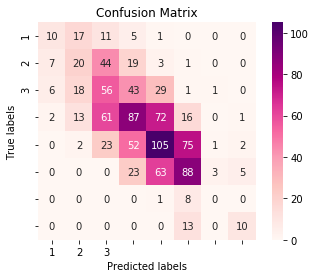

In [58]:
model = GradientBoostingClassifier(max_depth = 3, learning_rate = 0.15, min_samples_split = 20, subsample = 0.5, n_estimators = 10)
model = model.fit(x_train, y_train)
prediction = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, prediction)

ax = sns.heatmap(conf_matrix, annot=True, square=True, fmt = 'g', cmap="RdPu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '2', '3']); 
ax.yaxis.set_ticklabels(['1', '2', '3']);
print('Accuracy : %.3f' % accuracy_score(y_test, prediction))

# <span style="color:#FD4887">API Flask</span>

In [59]:
# To predit the LeagueIndex :
pickle.dump(model, open('model1.pickle', 'wb'))
# To predict the player's level:
pickle.dump(model_GB, open('model2.pickle', 'wb'))

In [ ]:
parameters = dict(random_state =[5],
                 learning_rate = [0.05, 0.1, 0.15], 
                 min_samples_split = [2, 10, 20])
clf_GS = GridSearchCV(GradientBoostingClassifier(), parameters)
clf_GS.fit(x_scaled, y_level)
print('Best random_state:', clf_GS.best_estimator_.get_params()['random_state'])
print('Best learning_rate:', clf_GS.best_estimator_.get_params()['learning_rate'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])

In [ ]:
GB = GradientBoostingClassifier(random_state = 5, learning_rate = 0.1, min_samples_split = 20)
cross_val_score(GB, x_scaled, y_level, cv=5).mean()

Gradient boosting without scaling:

In [ ]:
parameters = dict(random_state =[5],
                 learning_rate = [0.1, 0.15], 
                 min_samples_split = [10, 20], 
                 max_depth=[3, 5, 8])
clf_GS = GridSearchCV(GradientBoostingClassifier(), parameters)
model = clf_GS.fit(x, y_level)
print('Best random_state:', clf_GS.best_estimator_.get_params()['random_state'])
print('Best learning_rate:', clf_GS.best_estimator_.get_params()['learning_rate'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

In [ ]:
GB = GradientBoostingClassifier(random_state = 5, learning_rate = 0.15, min_samples_split = 20)
cross_val_score(GB, x, y_level, cv=5).mean( )  

In [ ]:
#GB.fit(x, y)
pickle.dump(model, open('model2.pickle', 'wb'))


In [ ]:
regressor = LogisticRegression()
regressor.fit(x, y)
pickle.dump(regressor, open('model1.pickle', 'wb'))
#model = pickle.load(open('model.pickle', 'rb'))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 6)) 
sns.heatmap(conf_matrix, annot=True, square=True, cmap="BrBG");

In [ ]:
logReg = LogisticRegression(C = 923.67, penalty = "l1")
cross_val_score(logReg, x, y_level, cv=5).mean()

In [ ]:
logReg = LogisticRegression(C = 1.37382, penalty = "l2")
cross_val_score(logReg, x_scaled, y_level, cv=5).mean()